In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
df = pd.read_csv('wine-clustering.csv'
                )
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Correlation matrix 

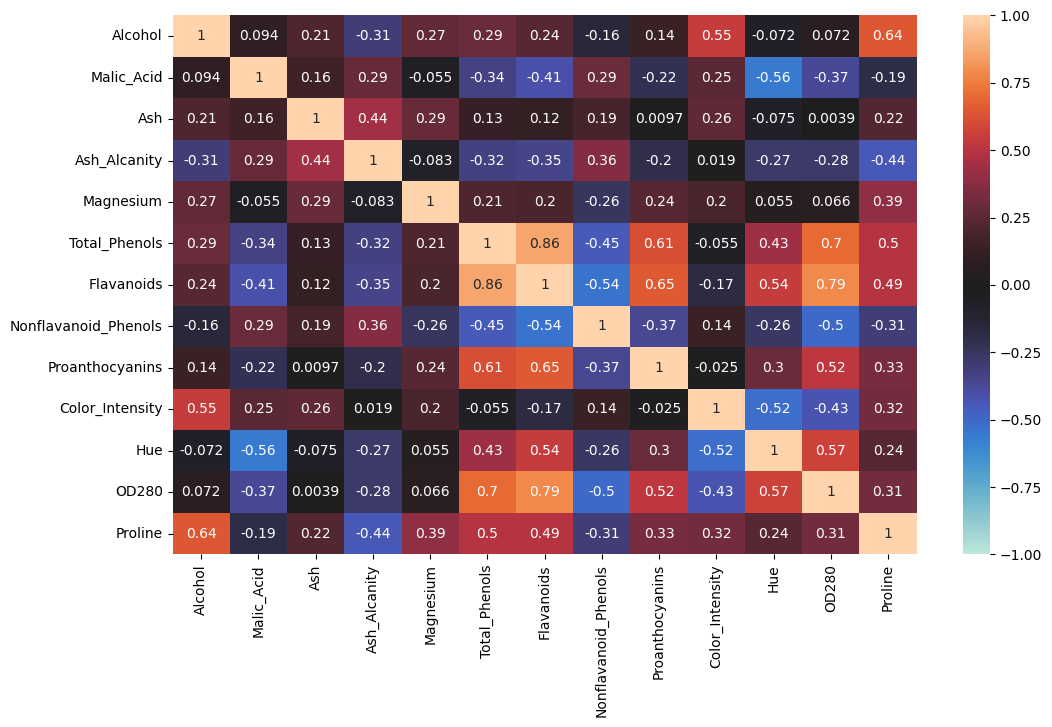

In [5]:
plt.figure(figsize=(12,7))
corr = df.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

In [6]:
# data scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCA - Pricipal component Analysis 

In [7]:
# Perform PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [0.36198848 0.1920749  0.11123631]


In [8]:
# Principal Components 
df1 = pd.DataFrame(columns=['x','y' , 'z'], data=df_pca)
df1

,x,y,z
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


# Kmean Clustering

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [10]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(df1)

# Compute the silhouette score
score = silhouette_score(df1, labels)

print("Silhouette score:", score)

Silhouette score: 0.45379998482576156


In [11]:
# Adding cluster number in the data
df1['cluster_pca'] = kmeans.predict(df1)

In [12]:
df1.head()

,x,y,z,cluster_pca
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1


In [13]:
# Plot of the dataset according to the cluster
centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
centroids_z = centroids[:,2]


### Optimal value of n_cluster using Elbow method

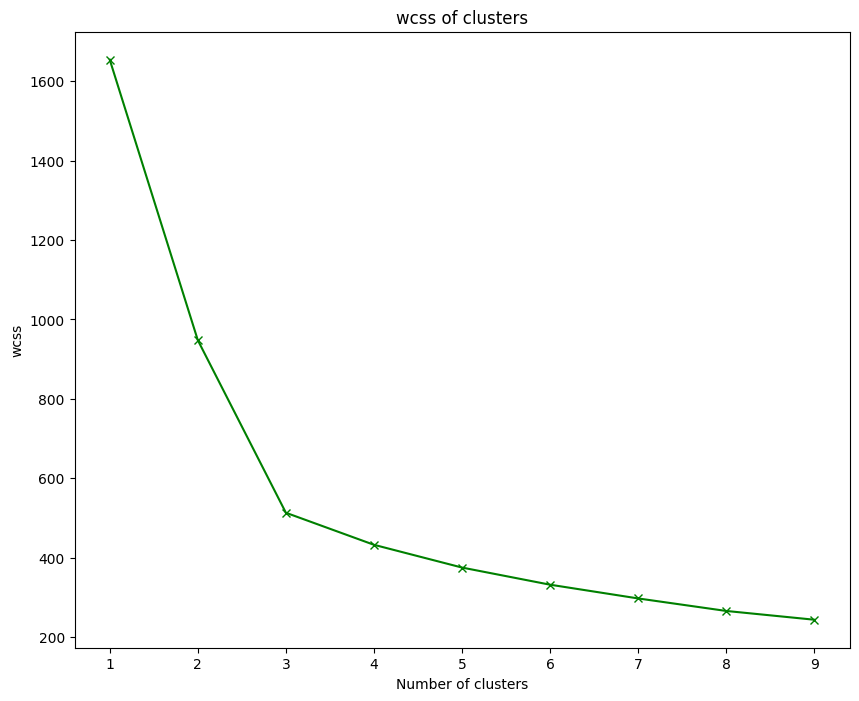

In [15]:
plt.figure(figsize=(10,8))

wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', random_state=42)
    kmeans.fit(df1)
    wcss .append(kmeans.inertia_)
wcss

plt.plot(range(1,10),wcss,'gx-')
plt.title('wcss of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

 According to this n = 3 is the optimal 

WHich is our Previous model

## silhouette score - Gives Optimal value of n_cluster 
The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better clustering.

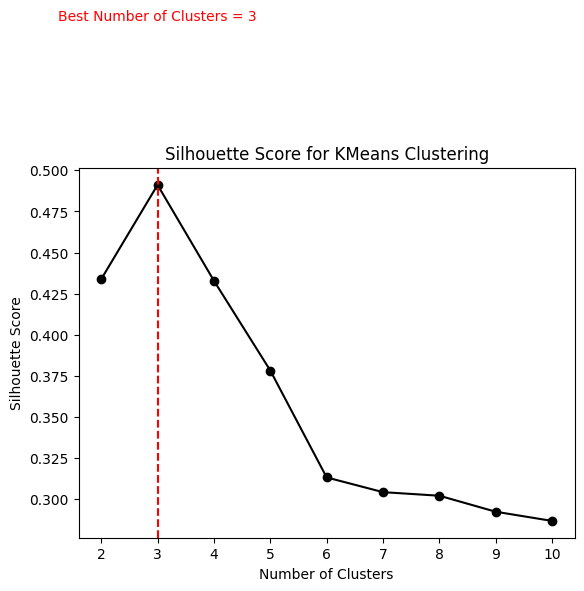

In [17]:
# create an empty list to store the silhouette scores for each cluster
silhouette_scores = []
cluster_range = range(2,11)
# loop over the range of clusters and compute the silhouette score for each
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# create a sub-plot with cluster-wise silhouette scores
fig, ax = plt.subplots()
ax.plot(cluster_range, silhouette_scores, 'o-', color="black")
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('Silhouette Score for KMeans Clustering')

# add vertical line for the best number of clusters based on the silhouette score
best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
ax.axvline(x=best_n_clusters, linestyle='--', color='red')
ax.annotate('Best Number of Clusters = {}'.format(best_n_clusters), 
            xy=(best_n_clusters, max(silhouette_scores)), 
            xytext=(best_n_clusters, max(silhouette_scores)+0.1),
            color='red',
            fontsize=10,
            ha='center')
plt.show()
